# What makes a banger movie?
*(Banger meaning successful in terms of revenue and popularity)*

# Goals

Our goal is to determine how to make a movie with the highest revenue possible.

The three questions we will be looking at are:
1. What runtime produces the biggest revenue?
2. Which genre produces the biggest revenue?
3. Which director produces the biggest revenue?

These are all in hopes of achiveing the winning formula to create our first banger movie.

## Data

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
con = sqlite3.connect('../zippedData/im.db')
cursor = con.cursor()

Setting up to tackle the first two goals with this data.

In [4]:
joint_movies = pd.read_sql("""
select movie_basics.*, movie_ratings.averagerating, movie_ratings.numvotes from movie_basics inner join movie_ratings on movie_basics.movie_id = movie_ratings.movie_id
""", con)
joint_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [5]:
movie_gross = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Next we are going to join both the joint_movies with ratings and the movie_revenue data only on the rows that the title is present in both datasets. This way we only have data we can use as they have all the necessary components.

In [6]:
joint_movies_revenue = joint_movies.merge(movie_gross, how="inner", left_on="primary_title", right_on="title")
joint_movies_revenue

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,The Chambermaid,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,How Long Will I Love U,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,Last Letter,CL,181000.0,NaN,2018


In [82]:
goal1_columns = ["movie_id", "primary_title", "runtime_minutes", "domestic_gross", "foreign_gross"]
goal1 = joint_movies_revenue[goal1_columns]
# turn the comma formatted foreign gross into number readable format
goal1['foreign_gross'] = goal1['foreign_gross'].str.replace(',', '')

<ipython-input-82-89679f882624>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goal1['foreign_gross'] = goal1['foreign_gross'].str.replace(',', '')


Next we are going to look at how genres affect revenue. We need to split the genres into a row of the same movie for each genre so every genre is reflected for multi-genre movies.

In [76]:
goal2_columns = ["movie_id", "primary_title", "genres", "domestic_gross", "foreign_gross"]
goal2 = joint_movies_revenue[goal2_columns]
goal2 = goal2.dropna()
goal2['foreign_gross'] = goal2['foreign_gross'].str.replace(',', '').astype(float)
goal2['genres'] = goal2["genres"].str.split(',')
goal2 = goal2.explode('genres').reset_index(drop=True)
goal2

,movie_id,primary_title,genres,domestic_gross,foreign_gross
0,tt0337692,On the Road,Adventure,744000.0,8000000.0
1,tt0337692,On the Road,Drama,744000.0,8000000.0
2,tt0337692,On the Road,Romance,744000.0,8000000.0
3,tt4339118,On the Road,Drama,744000.0,8000000.0
4,tt5647250,On the Road,Drama,744000.0,8000000.0
...,...,...,...,...,...
4366,tt8097306,Nobody's Fool,Drama,31700000.0,1800000.0
4367,tt8097306,Nobody's Fool,Romance,31700000.0,1800000.0
4368,tt8404272,How Long Will I Love U,Romance,747000.0,82100000.0
4369,tt9151704,Burn the Stage: The Movie,Documentary,4200000.0,16100000.0


In [77]:
domestic_genres = goal2.groupby('genres')["domestic_gross"].mean().reset_index()
foreign_genres = goal2.groupby('genres')["foreign_gross"].mean().reset_index()
foreign_genres

,genres,foreign_gross
0,Action,1.471664e+08
1,Adventure,2.113731e+08
2,Animation,2.067099e+08
3,Biography,4.532450e+07
4,Comedy,7.547840e+07
5,Crime,4.118044e+07
6,Documentary,3.840048e+07
7,Drama,4.203809e+07
8,Family,9.635342e+07
9,Fantasy,1.429671e+08


Now we are going to find the directors that produce the highest revenue movies.

In [87]:
movies_with_directors = pd.read_sql("""
select mb.*, p.primary_name from movie_basics mb inner join directors d on mb.movie_id = d.movie_id inner join persons p on d.person_id = p.person_id
""", con)
movies_with_directors = movies_with_directors.drop_duplicates().reset_index(drop=True)
movies_with_directors

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,primary_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Mani Kaul
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Orson Welles
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Hrishikesh Mukherjee
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Raoul Ruiz
...,...,...,...,...,...,...,...
163290,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Ana Célia de Oliveira
163291,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Kanchan Nayak
163292,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
163293,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Vinicius Augusto Bozzo


In [88]:
movies_with_directors.rename(columns={"primary_name": "director"}, inplace=True)
movies_with_directors

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,director
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Mani Kaul
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Orson Welles
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Hrishikesh Mukherjee
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Raoul Ruiz
...,...,...,...,...,...,...,...
163290,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Ana Célia de Oliveira
163291,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Kanchan Nayak
163292,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
163293,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Vinicius Augusto Bozzo


In [96]:
directors_with_revenue = movies_with_directors.merge(movie_gross, how="inner", left_on="primary_title", right_on="title")
directors_with_revenue['foreign_gross'] = directors_with_revenue["foreign_gross"].str.replace(',', '').astype(float)
directors_with_revenue


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,director,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Bejoy Nambiar,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",Walter Salles,On the Road,IFC,744000.0,8000000.0,2012
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,Harutyun Azaryan,On the Road,IFC,744000.0,8000000.0,2012
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,Marvin Dau,On the Road,IFC,744000.0,8000000.0,2012
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,Poong-ki Kim,On the Road,IFC,744000.0,8000000.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
3774,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,Pradeep Sarkar,Helicopter Eela,Eros,72000.0,NaN,2018
3775,tt8851262,Spring Fever,Spring Fever,2019,NaN,"Comedy,Horror",Chris McElyea,Spring Fever,Strand,10800.0,150000.0,2010
3776,tt8851262,Spring Fever,Spring Fever,2019,NaN,"Comedy,Horror",Izzy Sutton,Spring Fever,Strand,10800.0,150000.0,2010
3777,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",Shunji Iwai,Last Letter,CL,181000.0,NaN,2018


In [102]:
domestic_directors = directors_with_revenue.groupby('director')["domestic_gross"].mean().reset_index().sort_values("domestic_gross", ascending=False).head(10)
foreign_directors = directors_with_revenue.groupby('director')["foreign_gross"].mean().reset_index().sort_values("foreign_gross", ascending=False).head(10)

## Results

Well using the charts that we drew up with this data analysis, we can draw some very obvious conclusions on how to produce a movie with the highest chances of producing a favorable revenue.

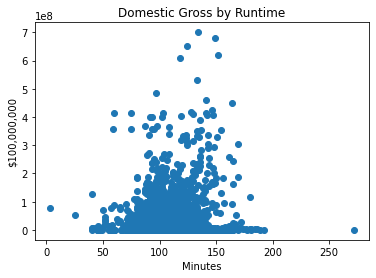

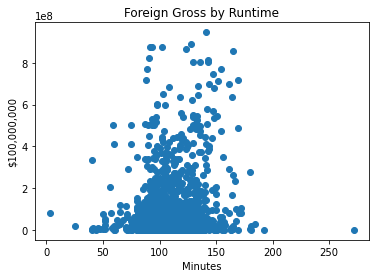

In [106]:
plt.scatter(goal1["runtime_minutes"], goal1["domestic_gross"])
plt.ylabel("$100,000,000")
plt.xlabel("Minutes")
plt.title("Domestic Gross by Runtime")
plt.show()

plt.scatter(goal1["runtime_minutes"], goal1["foreign_gross"])
plt.ylabel("$100,000,000")
plt.xlabel("Minutes")
plt.title("Foreign Gross by Runtime")
plt.show()

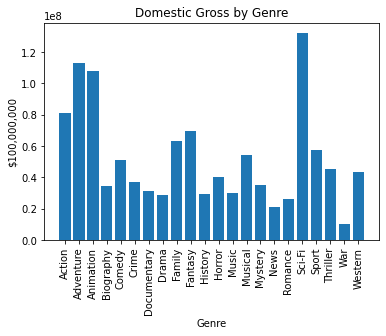

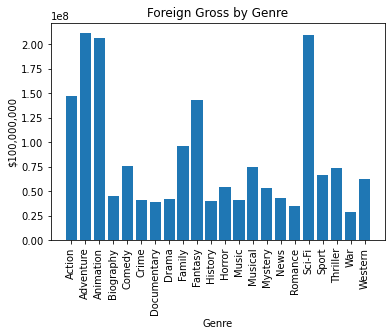

In [105]:
plt.bar(domestic_genres["genres"], domestic_genres["domestic_gross"])
plt.ylabel("$100,000,000")
plt.xlabel("Genre")
plt.title("Domestic Gross by Genre")
plt.xticks(rotation=90)
plt.show()

plt.bar(foreign_genres["genres"], foreign_genres["foreign_gross"])
plt.ylabel("$100,000,000")
plt.xlabel("Genre")
plt.title("Foreign Gross by Genre")
plt.xticks(rotation=90,)
plt.show()

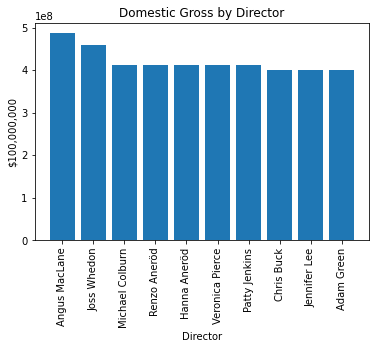

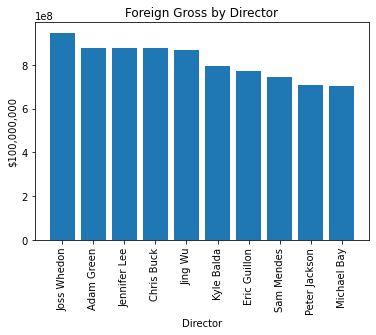

In [104]:
plt.bar(domestic_directors["director"], domestic_directors["domestic_gross"])
plt.ylabel("$100,000,000")
plt.xlabel("Director")
plt.title("Domestic Gross by Director")
plt.xticks(rotation=90)
plt.show()

plt.bar(foreign_directors["director"], foreign_directors["foreign_gross"])
plt.ylabel("$100,000,000")
plt.xlabel("Director")
plt.title("Foreign Gross by Director")
plt.xticks(rotation=90,)
plt.show()

### Business Recommendation 1

In terms of runtime in minutes for most likely producing a succesful movie, it looks like creating a movie run time between 100 and 150 minutes have the highest chance of producing a movie with a very high revenue.

### Business Recommendation 2

In terms of choosing a genre to produce a succesful movie, it looks like creating a movie of the Sci-fi genre will generate the most revenue in both the domestic and foreign industries.

### Business Recommendation 3

In terms of choosing a director to produce a succesful movie, it looks like you have multiple options but there is one director that has produced the most average money in both the foreign and domestic industries. Their name is Joss Whedon.